In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
import joblib
import os

In [ ]:
import dagshub
dagshub.init(repo_owner='Mohdmuzaffar307', repo_name='Loan-Approval-end-to-end', mlflow=True)

In [18]:
df=pd.read_csv(r'C:/Users/mdmuz/.cache/kagglehub/datasets/anishdevedward/loan-approval-dataset\versions/1/loan_approval.csv')
df.head(2)

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False


In [20]:
df=df.drop(columns='name')

In [21]:
df['loan_approved']=df['loan_approved'].map({True:1,False:0})

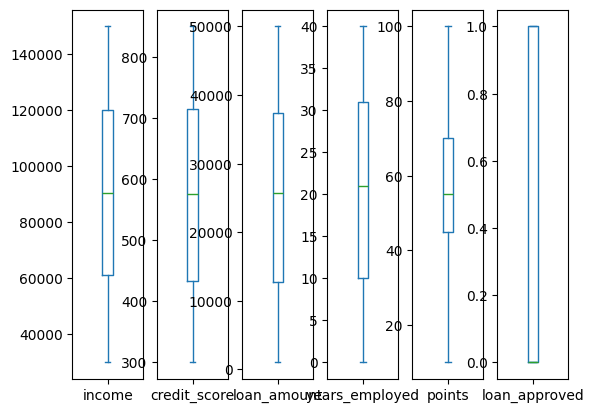

In [22]:
df.plot(kind='box',subplots=True)
plt.show()

In [23]:
df

,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,East Jill,113810,389,39698,27,50.0,0
1,New Jamesside,44592,729,15446,28,55.0,0
2,Lake Roberto,33278,584,11189,13,45.0,0
3,West Melanieview,127196,344,48823,29,50.0,0
4,Mariastad,66048,496,47174,4,25.0,0
...,...,...,...,...,...,...,...
1995,Robertton,92163,770,12251,13,85.0,1
1996,New Frank,38799,635,48259,17,40.0,0
1997,East Haley,41957,763,16752,5,60.0,1
1998,Adamland,139022,360,24031,35,55.0,0


In [65]:
df.select_dtypes(include=['int32', 'int64', 'float64'])

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,0
1,44592,729,15446,28,55.0,0
2,33278,584,11189,13,45.0,0
3,127196,344,48823,29,50.0,0
4,66048,496,47174,4,25.0,0
...,...,...,...,...,...,...
1995,92163,770,12251,13,85.0,1
1996,38799,635,48259,17,40.0,0
1997,41957,763,16752,5,60.0,1
1998,139022,360,24031,35,55.0,0


In [26]:
df.select_dtypes(include='object')

,city
0,East Jill
1,New Jamesside
2,Lake Roberto
3,West Melanieview
4,Mariastad
...,...
1995,Robertton
1996,New Frank
1997,East Haley
1998,Adamland


In [31]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='loan_approved'),df.iloc[:,-1],test_size=0.2,random_state=42)

In [32]:
num_cols=x_train.select_dtypes(include=['int32', 'int64', 'float64']).columns
cat_cols=x_train.select_dtypes(include='object').columns

In [33]:
transformer=ColumnTransformer(transformers=[
    ('stndard_scaler',StandardScaler(),num_cols),
    ('ohne',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),cat_cols)
],remainder='passthrough')
transformer.set_output(transform='pandas')

,transformers,"[('stndard_scaler', ...), ('ohne', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [34]:
transformer.fit(x_train)

,transformers,"[('stndard_scaler', ...), ('ohne', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [36]:
x_train_transform=transformer.transform(x_train)
x_test_transform=transformer.transform(x_test)

Accessing as Mohdmuzaffar307

Initialized MLflow to track repo "Mohdmuzaffar307/Loan-Approval-end-to-end"

Repository Mohdmuzaffar307/Loan-Approval-end-to-end initialized!

In [38]:
mlflow.set_experiment('end-to-end-project')

2025/11/15 10:29:00 INFO mlflow.tracking.fluent: Experiment with name 'end-to-end-project' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/87a9474a17614728ad8553ed7aa5fd13', creation_time=1763182740661, experiment_id='0', last_update_time=1763182740661, lifecycle_stage='active', name='end-to-end-project', tags={}>

In [43]:
clf=RandomForestClassifier()


In [53]:
param_grid = {
    # Number of trees in the forest
    "n_estimators": [100, 200, 300, 500],
    # Maximum depth of the trees
    "max_depth": [None, 15, 20, 30, 50],
    # Number of features to consider when looking for the best split
    "max_features": ["sqrt", "log2", None],
    # Whether bootstrap samples are used when building trees
    "bootstrap": [True,False]

}


In [54]:
gcc=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,scoring=["accuracy", "recall", "f1", "precision"],n_jobs=-1,verbose=1,refit='accuracy')

In [64]:


# Parent run
with mlflow.start_run(run_name="Parent_GridSearch_Run") as parent_run:
    print(f"Parent Run ID: {parent_run.info.run_id}")

    for params in ParameterGrid(param_grid):
        # Start a child run inside the parent
        with mlflow.start_run(run_name=f"Child_Run_{params}", nested=True):
            gcc.fit(x_train_transform,y_train)
            y_pred = gcc.predict(x_test_transform)
            
            # Metrics
            acc = accuracy_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            pre = precision_score(y_test, y_pred)

            # Log everything in the child run
            mlflow.log_params(params)
            mlflow.log_metrics({
                "accuracy": acc,
                "recall": rec,
                "f1": f1,
                "precision": pre
            })
            model_path=r"artifacts/gridsearchsc.joblib"
            os.makedirs(os.path.dirname(model_path),exist_ok=True)
            joblib.dump(gcc,open(model_path,'wb'))
            mlflow.log_artifact(model_path, artifact_path="Gcc-model")

            print(f"✅ Logged child run: {params} | Accuracy={acc:.4f}")
    
    # Optionally, log summary in parent
    mlflow.log_param("total_models_trained", len(list(ParameterGrid(param_grid))))


Parent Run ID: 127dd5f5742942ccbf2de3b7b79f6f16
Fitting 5 folds for each of 120 candidates, totalling 600 fits
✅ Logged child run: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100} | Accuracy=1.0000
🏃 View run Child_Run_{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100} at: https://dagshub.com/Mohdmuzaffar307/Loan-Approval-end-to-end.mlflow/#/experiments/0/runs/fdc194ba32f649449d6927c8909c074a
🧪 View experiment at: https://dagshub.com/Mohdmuzaffar307/Loan-Approval-end-to-end.mlflow/#/experiments/0
Fitting 5 folds for each of 120 candidates, totalling 600 fits
✅ Logged child run: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200} | Accuracy=1.0000
🏃 View run Child_Run_{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200} at: https://dagshub.com/Mohdmuzaffar307/Loan-Approval-end-to-end.mlflow/#/experiments/0/runs/9600733b06694ab5b631e4a3e36654ea
🧪 View experim

KeyboardInterrupt: 

In [66]:
x_train_transform

,stndard_scaler__income,stndard_scaler__credit_score,stndard_scaler__loan_amount,stndard_scaler__years_employed,stndard_scaler__points,ohne__city_Aaronstad,ohne__city_Adamburgh,ohne__city_Adamland,ohne__city_Adammouth,ohne__city_Adamsfort,...,ohne__city_Willisstad,ohne__city_Wilsonmouth,ohne__city_Wilsonstad,ohne__city_Wilsonview,ohne__city_Woodsburgh,ohne__city_Wrightchester,ohne__city_Yatesbury,ohne__city_Youngbury,ohne__city_Zacharyton,ohne__city_Zamoramouth
968,-1.170183,-0.675797,-0.217638,0.293376,-1.675295,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,-0.580842,-0.404008,-0.200153,-1.317359,-1.145034,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,-0.055065,1.387327,-0.536250,0.039050,1.506274,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692,-0.574118,-1.274967,-0.858543,0.717254,-0.614772,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,0.180173,1.171132,-1.203347,-1.232583,1.506274,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.341848,-0.484309,1.626930,0.208601,-0.614772,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.511494,-0.595495,1.214950,-1.741237,-1.145034,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,-0.200625,0.034560,-0.591393,-0.045726,-0.349641,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,1.243467,-1.120542,-0.876098,-0.384828,0.180620,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
